In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('/content/drive/MyDrive/AML/students_mental_health_survey.csv')
data = data.dropna()
data

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,20,Law,Female,3.33,1,1,1,Average,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,3,Moderate,29,Off-Campus
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus


In [ ]:
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].unique())
    print("-" * 50)


Column: Age
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]
--------------------------------------------------
Column: Course
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
--------------------------------------------------
Column: Gender
['Male' 'Female']
--------------------------------------------------
Column: CGPA
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9

In [ ]:
# data = data.drop(columns=[target_column])

In [3]:
# Define ordinal mappings
ordinal_mappings = {
    'Sleep_Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Physical_Activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Diet_Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Social_Support': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Substance_Use': {'Never': 0, 'Occasionally': 1, 'Frequently': 2},
    'Counseling_Service_Use': {'Never': 0, 'Occasionally': 1, 'Frequently': 2},
    'Extracurricular_Involvement': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Family_History': {'No': 0, 'Yes': 1},
    'Chronic_Illness': {'No': 0, 'Yes':1}
}

# Apply ordinal mapping to relevant columns
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)


In [4]:
target_column = 'Stress_Level'
X = data.drop(columns=[target_column])  # Features
Y = data[target_column]  # Target
Y = Y.apply(lambda x: 0 if x <= 2 else 1)
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [6]:
X

,Age,Course,Gender,CGPA,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,2,2,1,2,1,Married,0,0,0,0,2,1,17,On-Campus
1,24,Engineering,Female,2.44,3,0,1,0,1,0,Single,1,1,0,0,3,0,27,On-Campus
2,19,Business,Female,3.74,0,3,2,0,1,1,In a Relationship,0,1,0,0,4,2,15,On-Campus
4,18,Business,Male,3.40,3,4,2,0,1,2,Married,0,0,0,1,0,2,23,On-Campus
5,21,Medical,Female,3.35,4,3,2,1,2,2,Single,0,0,0,0,5,1,19,Off-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,20,Law,Female,3.33,1,1,1,0,1,1,In a Relationship,0,1,0,0,3,1,29,Off-Campus
7017,20,Law,Female,3.69,1,5,2,0,0,2,Single,0,2,1,0,1,2,26,Off-Campus
7018,24,Medical,Female,3.73,4,1,2,1,1,2,Single,0,1,0,0,3,0,15,Off-Campus
7019,26,Others,Male,3.65,5,1,2,2,0,1,Married,0,1,0,1,4,1,17,Off-Campus


In [5]:
y

NameError: name 'y' is not defined

In [26]:
num_cols = ['Age', 'CGPA',
            'Financial_Stress', 'Semester_Credit_Load',
            'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
            'Social_Support', 'Substance_Use',
            'Counseling_Service_Use', 'Extracurricular_Involvement']

cat_cols = ['Course', 'Gender', 'Relationship_Status', 'Family_History',
            'Chronic_Illness', 'Residence_Type']


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC(random_state=42,class_weight='balanced'))
])


# Example usage
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67       719
           1       0.65      0.44      0.52       680

    accuracy                           0.61      1399
   macro avg       0.62      0.61      0.60      1399
weighted avg       0.62      0.61      0.60      1399



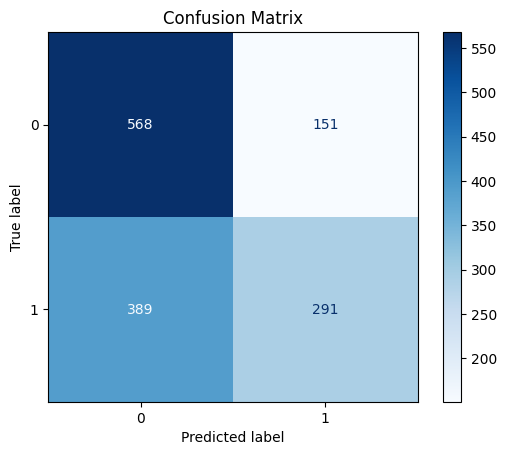

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [12]:

y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


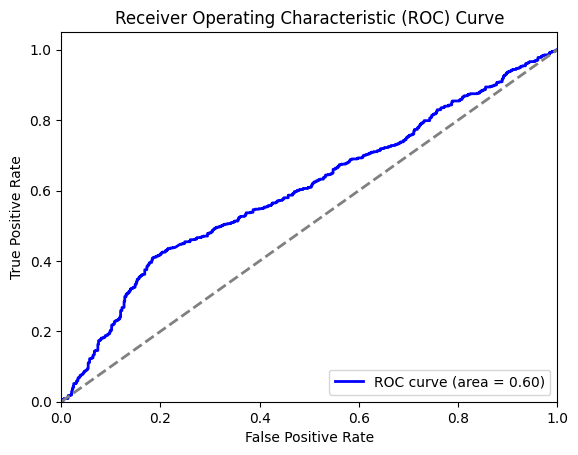

In [13]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


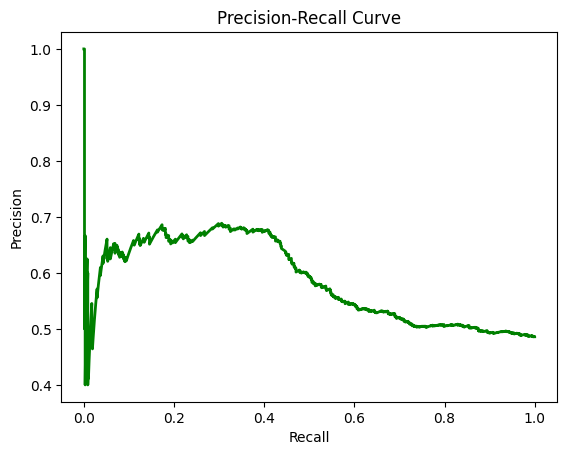

In [14]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
